# 웹캠, Colab, OpenPose 연동

웹캠으로 받은 영상을 Colabd과 연동하여 Colab에서 실행되는 OpenPose로 포즈를 추출하고 이를 노트북 화면으로 보여준다.

OpenPose 코드는 ildoonet님의 https://github.com/ildoonet/tf-pose-estimation를 사용하였고

webcam과 Colab 연동은 colab 가이드의 문서 https://colab.research.google.com/drive/1tbAeRge6KKgCYdC6ihDrsl80aRYoVOMa#scrollTo=QBFFBpx0TV5X&forceEdit=true&offline=true&sandboxMode=true를 참조하였다.


# OpenPose 설치

ildoonet님의 tf-pose-estimation을 다운로드 받고, 필요한 라이브러리를 설치한다.

In [1]:
%cd /content

!git clone https://github.com/ildoonet/tf-pose-estimation

%cd tf-pose-estimation
#!pip install -r requirements.txt
#!python setup.py install 
!pip install -e .

/content
/content/tf-pose-estimation
Obtaining file:///content/tf-pose-estimation
  Found existing installation: tf-pose 0.1.1
    Can't uninstall 'tf-pose'. No files were found to uninstall.
  Running setup.py develop for tf-pose


# 모델 다운로드

4개의 모델이 사용 가능한데, 3개는 이미 포함되어 있고 나머지 'cmu' 1개만 따로 다운로드 받으면 된다.

그런데 그것 사용안한다면 다운로드 받지 않아도 된다.

In [0]:
# 4개의 모델이 가능하다.
# 이중 cmu 모델만 크기가 200M여서 다른곳에 있다.
# 다른 모델을 사용할 경우 다운로드 하지 않아도 된다.

# 파일 저장된 곳이 변경되었나 보다. 다운로드가 안된다.
#! cd models/graph/cmu && bash download.sh

# 다음 url에서 직접 다운받아서 파일을 colab에 올린다.
#      http://www.mediafire.com/file/qlzzr20mpocnpa3/graph_opt.pb

# 포즈 추출 실행


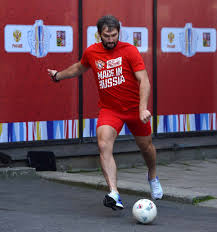

In [4]:
from IPython.display import Image, display
display(Image('images/p1.jpg'))

In [0]:
import sys
sys.path.insert(0, "/content/tf-pose-estimation/tf_pose")

pose_estimator = TfPoseEstimator(get_graph_path('mobilenet_v2_large'), target_size=(w, h))

[BodyPart:0-(0.51, 0.17) score=0.95 BodyPart:1-(0.51, 0.22) score=0.82 BodyPart:2-(0.42, 0.23) score=0.77 BodyPart:3-(0.35, 0.29) score=0.70 BodyPart:4-(0.27, 0.32) score=0.72 BodyPart:5-(0.59, 0.21) score=0.66 BodyPart:6-(0.67, 0.34) score=0.80 BodyPart:7-(0.66, 0.46) score=0.78 BodyPart:8-(0.51, 0.47) score=0.68 BodyPart:9-(0.47, 0.62) score=0.69 BodyPart:10-(0.53, 0.83) score=0.74 BodyPart:11-(0.61, 0.45) score=0.62 BodyPart:12-(0.67, 0.63) score=0.86 BodyPart:13-(0.70, 0.78) score=0.66 BodyPart:14-(0.49, 0.15) score=0.95 BodyPart:15-(0.52, 0.14) score=0.93 BodyPart:16-(0.46, 0.15) score=0.86 BodyPart:17-(0.55, 0.13) score=0.60]


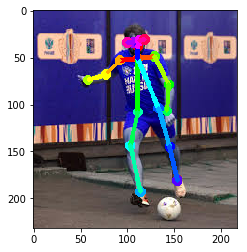

In [12]:

from tf_pose import common
from tf_pose.estimator import TfPoseEstimator
from tf_pose.networks import get_graph_path
import matplotlib.pyplot as plt
import cv2

image = cv2.imread('images/p1.jpg')

w = 400
h = 300

pose_extracted = pose_estimator.inference(image, resize_to_default=(w>0 and h>0), upsample_size=4.0)
print(pose_extracted)

pose_extracted_image = TfPoseEstimator.draw_humans(image, pose_extracted, imgcopy=False)
plt.imshow(pose_extracted_image)
plt.show()

# COCO 스타일 데이터 추출
아래의 방법으로 사용하면 COCO 스타일 데이터로 추출할 수 있다.

In [13]:
import tf_pose
humans = tf_pose.infer('./images/p1.jpg')
print(humans)


[([111, 38, 2, 113, 34, 2, 106, 34, 2, 119, 32, 2, 100, 32, 2, 129, 50, 2, 92, 52, 2, 145, 78, 2, 78, 68, 2, 145, 106, 2, 58, 74, 2, 135, 106, 2, 108, 108, 2, 145, 144, 2, 102, 144, 2, 155, 180, 2, 115, 192, 2], 1.7460929155349731)]


# OpenPose 호출 함수 선언

웹캠으로 전달받은 이미지를 OpenPose로 처리하기 위한 함수를 선언한다.

In [14]:
import sys
sys.path.insert(0, "/content/tf-pose-estimation/tf_pose")

from tf_pose import common
from tf_pose.estimator import TfPoseEstimator
from tf_pose.networks import get_graph_path

w = 400
h = 300

pose_estimator = TfPoseEstimator(get_graph_path('mobilenet_v2_large'), target_size=(w, h))



def extract_pose(image):
  humans = pose_estimator.inference(image, resize_to_default=(w>0 and h>0), upsample_size=4.0)
  return humans
  
def get_pose_extracted_image(image):
  humans = extract_pose(image)
  pose_extracted_image = TfPoseEstimator.draw_humans(image, humans, imgcopy=False)
  return pose_extracted_image
  

[2019-08-06 22:15:00,786] [TfPoseEstimator] [INFO] loading graph from /content/tf-pose-estimation/models/graph/mobilenet_v2_large/graph_opt.pb(default size=400x300)
I0806 22:15:00.786810 140121840994176 estimator.py:310] loading graph from /content/tf-pose-estimation/models/graph/mobilenet_v2_large/graph_opt.pb(default size=400x300)


TfPoseEstimator/Openpose/concat_stage7/axis
TfPoseEstimator/Mconv7_stage6_L2/biases
TfPoseEstimator/Mconv7_stage6_L2/weights
TfPoseEstimator/Mconv6_stage6_L2/biases
TfPoseEstimator/Mconv6_stage6_L2/weights
TfPoseEstimator/Mconv5_stage6_L2/biases
TfPoseEstimator/Mconv5_stage6_L2/weights
TfPoseEstimator/Mconv4_stage6_L2/biases
TfPoseEstimator/Mconv4_stage6_L2/weights
TfPoseEstimator/Mconv3_stage6_L2/biases
TfPoseEstimator/Mconv3_stage6_L2/weights
TfPoseEstimator/Mconv2_stage6_L2/biases
TfPoseEstimator/Mconv2_stage6_L2/weights
TfPoseEstimator/Mconv1_stage6_L2/biases
TfPoseEstimator/Mconv1_stage6_L2/weights
TfPoseEstimator/Mconv7_stage6_L1/biases
TfPoseEstimator/Mconv7_stage6_L1/weights
TfPoseEstimator/Mconv6_stage6_L1/biases
TfPoseEstimator/Mconv6_stage6_L1/weights
TfPoseEstimator/Mconv5_stage6_L1/biases
TfPoseEstimator/Mconv5_stage6_L1/weights
TfPoseEstimator/Mconv4_stage6_L1/biases
TfPoseEstimator/Mconv4_stage6_L1/weights
TfPoseEstimator/Mconv3_stage6_L1/biases
TfPoseEstimator/Mconv3_st

# 웹화면 구성

2개의 엘리멘트를 생성한다.

웹캠으로 받은 영상을 그대로 보여주는  'video'와 OpenPose로 처리한 것을 보여주는'output'이름의  'img'
  
  

In [0]:
from IPython.display import HTML, Image
from google.colab.output import eval_js
from base64 import b64decode

VIDEO_HTML = """
<video autoplay
 width=400 height=300></video>
<br>
<img id="output" src="https://ko.wikipedia.org/static/images/wikimedia-button.png"/>


<script>
var video = document.querySelector('video')
navigator.mediaDevices.getUserMedia({ video: true })
  .then(stream=> video.srcObject = stream)

var canvas = document.createElement('canvas')
var [w,h] = [video.offsetWidth, video.offsetHeight]
canvas.width = w
canvas.height = h


</script>
"""

DATA_HTML = """
<script>
canvas.getContext('2d').drawImage(video, 0, 0, w, h)
var data = canvas.toDataURL('image/jpeg', %f)
</script>
"""

# 웹캠 포즈 추츨 실행

위에서 설정한 video에서 데이터를 읽고, OpenPose를 호출하여 처리한 이미지를 표시한다.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  # Remove the CWD from sys.path while we load stuff.


KeyboardInterrupt: ignored

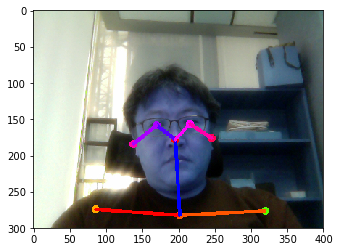

In [0]:
from IPython.display import Image, display
from matplotlib import pyplot as plt
import cv2
import numpy as np
import base64

%matplotlib inline

def convert_jpeg_binary_to_cv2_image(binary_image):
  return cv2.imdecode(np.fromstring(binary_image, dtype=np.uint8), -1)


def show_pose_extracted(quality=1.0):
  display(HTML(VIDEO_HTML))
  while True:
    display(HTML(DATA_HTML % quality))
    data = eval_js("data")
    binary = b64decode(data.split(',')[1])
    cv2_image = convert_jpeg_binary_to_cv2_image(binary)
    
    extracted = get_pose_extracted_image(cv2_image)
    
    binanry_img = cv2.imencode('.jpg', extracted)[1]
    
    b64 = base64.b64encode(binanry_img).decode('ascii')
    display(HTML('''<script>document.getElementById("output").src="data:image/jpg;base64, {}"</script>'''.format(b64)))
    if data is None: break

  
show_pose_extracted()